In [0]:
# This notebook explores the training dataset for the Titanic data

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import required libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns


In [18]:
# Load the data
df = pd.read_csv("/content/drive/My Drive/MSDS_422/train.csv")
fig = plt.figure(figsize = (18,6))

<Figure size 1296x432 with 0 Axes>

In [19]:
# Reveal the shape and counts of the data frame
print (df.shape)
print (df.count())

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [20]:
# Show first five entries of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Present summary statistics of the training data 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


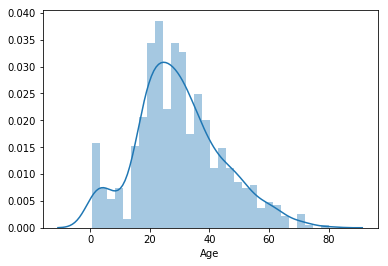

In [22]:

sns.distplot(df['Age'], bins=30)

Text(0.5, 1.0, 'Embarcation Point')

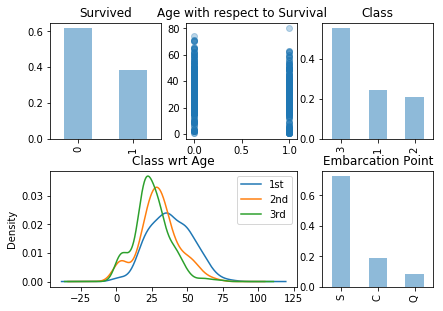

In [23]:
# Plotting number of survived passengers
plt.subplot2grid((2,3),(0,0))
plt.tight_layout(pad=1, w_pad=1.75, h_pad=1.5)
df.Survived.value_counts(normalize = True).plot(kind="bar",alpha=0.5)
plt.title("Survived")


# Showing Age with respect to Survival
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha = 0.3)
plt.title('Age with respect to Survival')


# Showing the proportions of each class of passenger
plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts(normalize = True).plot(kind="bar",alpha=0.5, title="Class")
plt.title("Class")

# Kernel Density Estimation of class with wrt age
plt.subplot2grid((2,3), (1,0), colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title("Class wrt Age")
plt.legend(("1st","2nd","3rd"))

# Bar graph showing embarkation point for passengers
plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize = True).plot(kind="bar",alpha=0.5, title="Class")
plt.title("Embarcation Point")

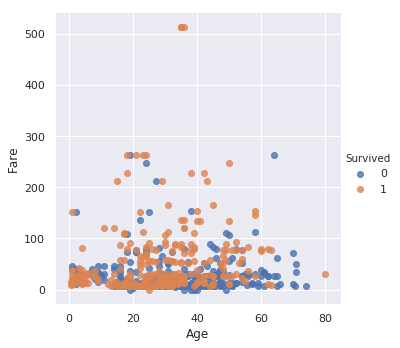

In [24]:
# Examining Fare versus Age
sns.set(color_codes=True)
vis = sns.lmplot(data = df, x = 'Age', y = 'Fare', fit_reg=False, hue='Survived')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


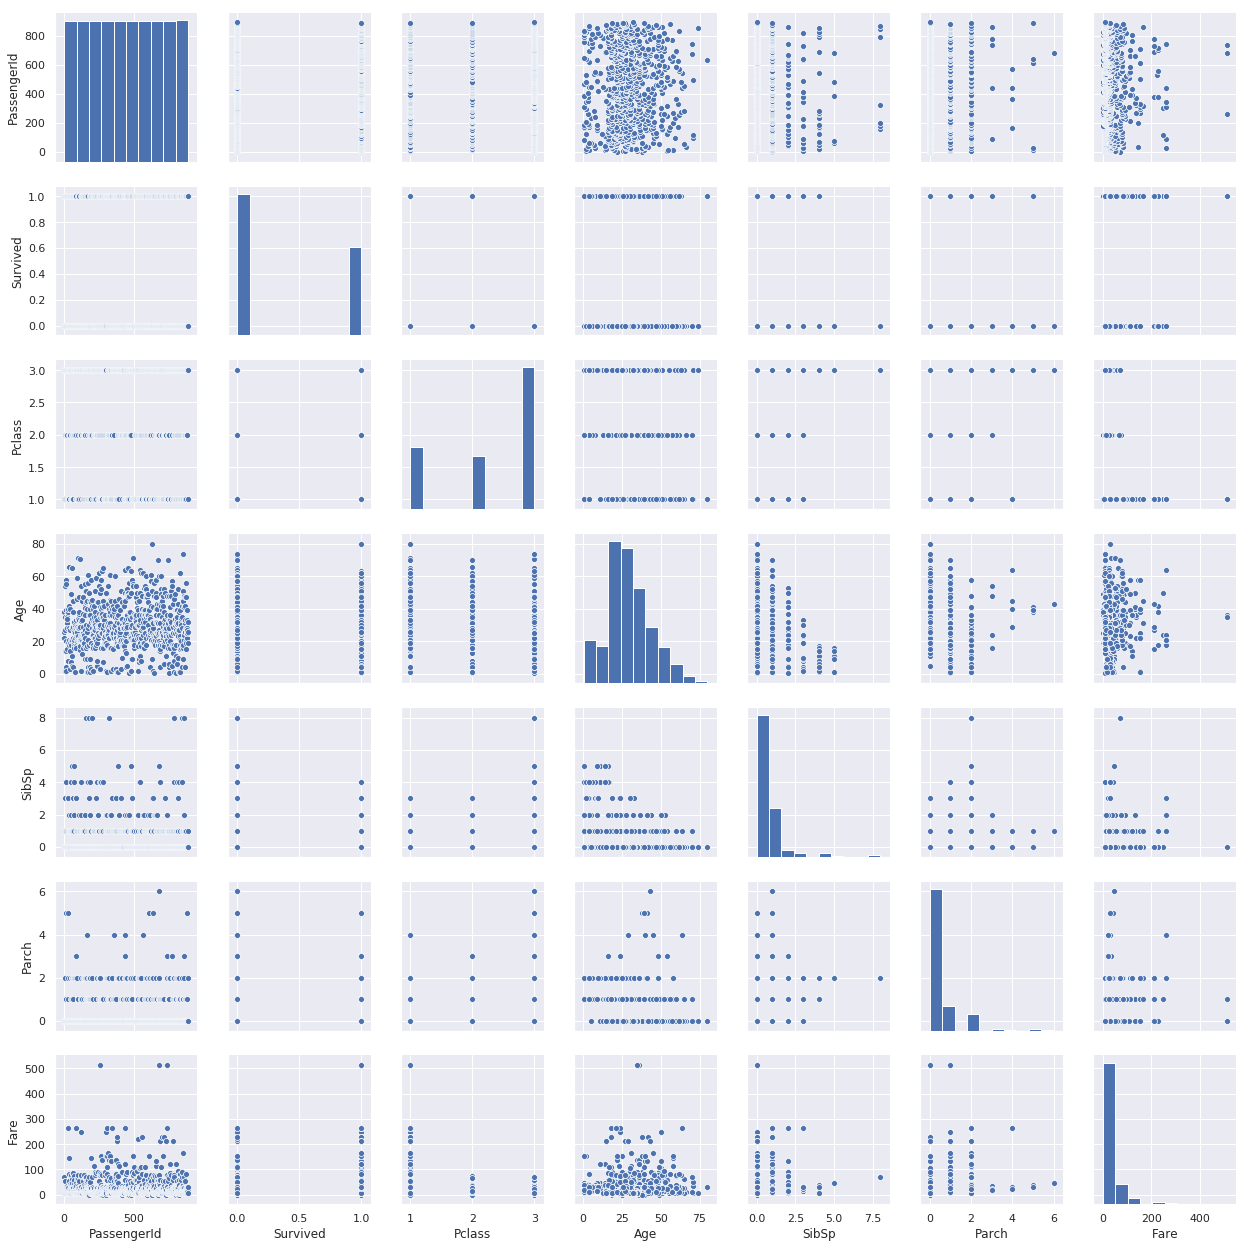

In [25]:
# A whole lot of plots comparing all the attributes to each other
g = sns.pairplot(df)